In [7]:
import sklearn.datasets
import sklearn.model_selection
import sklearn.neighbors as sn
import sklearn.metrics as skm
import pandas as pd
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt

Prepare wine dataset

In [8]:
diabetes_data = sklearn.datasets.load_diabetes(as_frame=True)
diabetes_data

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

In [9]:

target_num2name = {ix: str(name) for ix, name in enumerate(diabetes_data['target_names'])}
feature_names_main = diabetes_data['feature_names']
# feature_names_main

KeyError: 'target_names'

In [203]:
diabetes_df = diabetes_data['frame']
diabetes_df['named_target'] = diabetes_df['target'].map(target_num2name)
diabetes_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,named_target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,class_2


Definition of hyper parameters.

In [204]:
# n - amount of best features
n_values = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# K - amount of splits
K_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 45]
# k - for knn
k_values = [4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50]


In [205]:
scores = pd.DataFrame(columns=['n', 'K', 'i', 'k', 'score'])
X = wine_df[feature_names_main]
y = wine_df['named_target']

for n in n_values:
    # select n best features
    data = SelectKBest(f_classif, k=n).fit_transform(X, y)
    for K in K_values:
        # split dataset
        skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=40)
        for i, (train_index, test_index) in enumerate(skf.split(data, y)):
            X_train = data[train_index]
            X_test = data[test_index]
            y_train = y[train_index]
            y_test = y[test_index]
            for k in k_values:
                # create and fit model
                model = sn.KNeighborsClassifier(n_neighbors=k)
                model.fit(X=X_train, y=y_train)
                # predict
                predictions = model.predict(X_test)
                # note mae
                score = skm.accuracy_score(
                    y_true=y_test,
                    y_pred=predictions
                )
                scores.loc[len(scores)] = [n, K, i, k, score]


Data as a table

In [206]:
scores

,n,K,i,k,score
0,4.0,2.0,0.0,4.0,0.741573
1,4.0,2.0,0.0,5.0,0.741573
2,4.0,2.0,0.0,6.0,0.730337
3,4.0,2.0,0.0,7.0,0.752809
4,4.0,2.0,0.0,8.0,0.741573
...,...,...,...,...,...
2452,4.0,45.0,44.0,20.0,0.666667
2453,4.0,45.0,44.0,25.0,0.666667
2454,4.0,45.0,44.0,30.0,0.666667
2455,4.0,45.0,44.0,40.0,0.666667


Data visualization for n

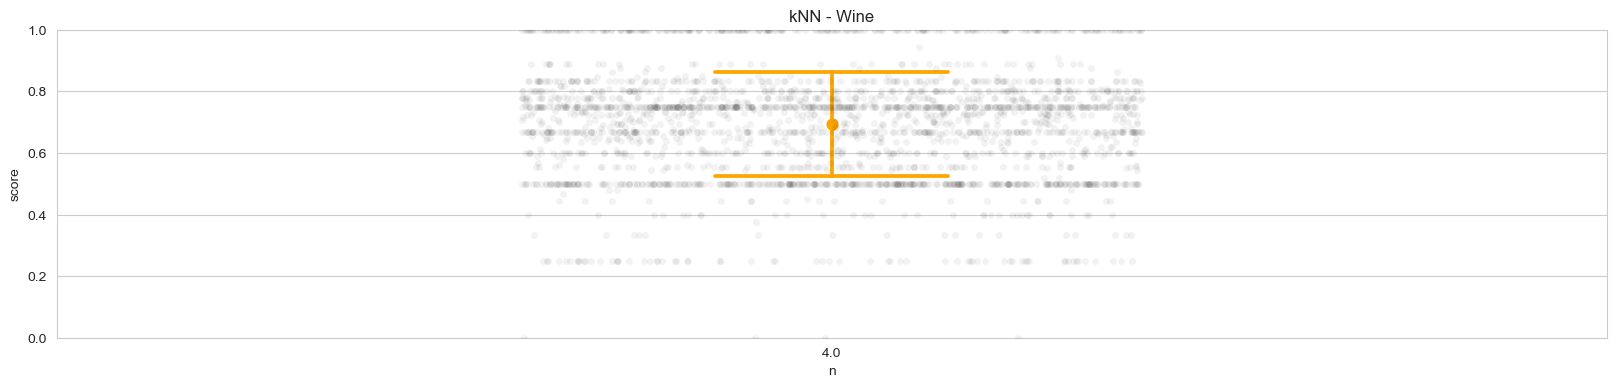

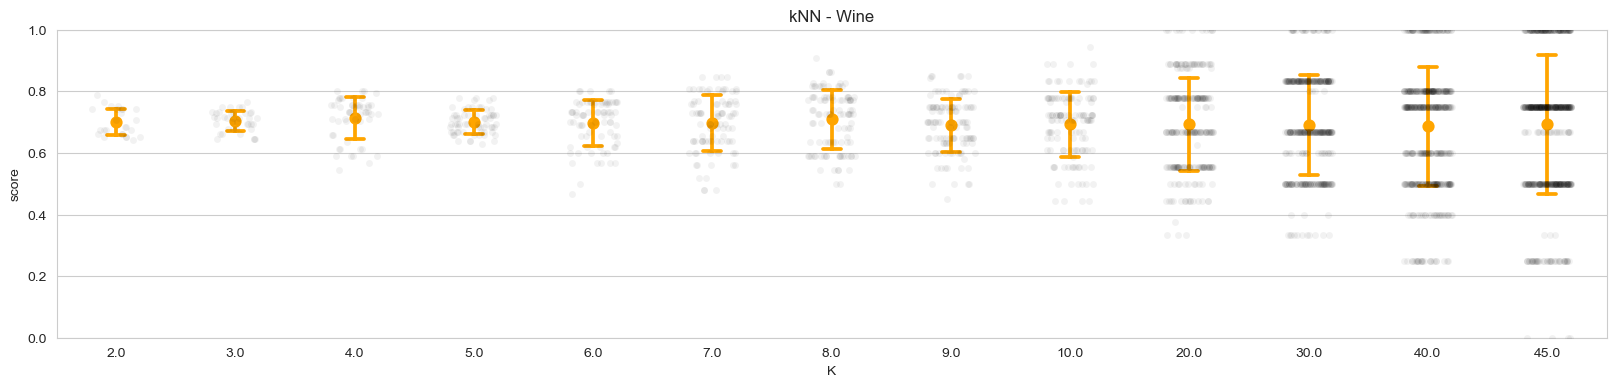

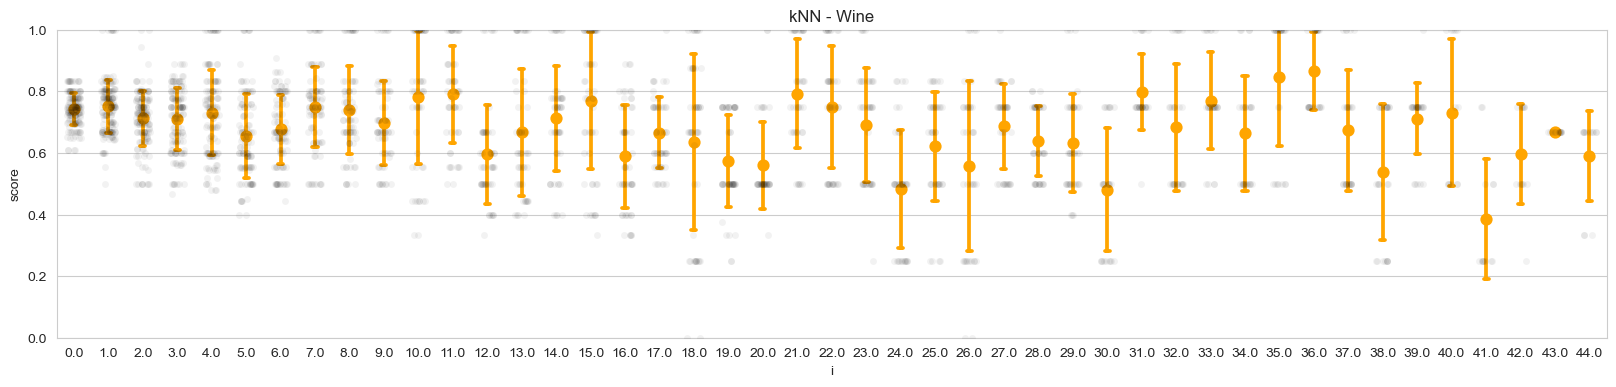

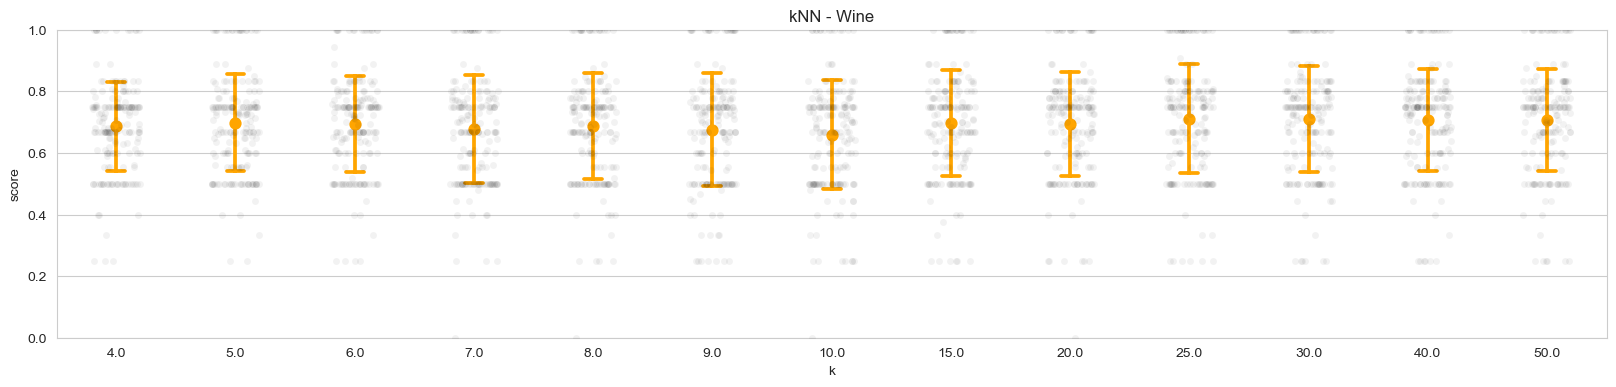

In [207]:
hyperparameters = ['n', 'K', 'i', 'k']

for hp in hyperparameters:
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(1, 1, figsize=(18, 3))
    sns.stripplot(
        scores,
        x=hp,
        y='score',
        alpha=0.05,
        color='k',
        ax=ax,
        jitter=0.2
    )
    sns.pointplot(
        scores,
        x=hp,
        y='score',
        errorbar="sd",
        capsize=.15,
        color='orange',
        linestyle='',
        ax=ax
    )
    _ = ax.set_ylim([0, 1])
    _ = ax.set_title('kNN - Iris')

Data visualization for K

Prepare diabetes dataset

In [209]:
# diabetes_data = sklearn.datasets.load_diabetes(as_frame=True)
# target_num2name_diabetes = {ix: str(name) for ix, name in enumerate(diabetes_data['target_names'])}
# feature_names_diabetes = diabetes_data['feature_names']
# feature_names_diabetes

In [210]:
# diabetes_df = diabetes_data['frame']
# diabetes_df['named_target'] = diabetes_df['target'].map(target_num2name_diabetes)
# diabetes_df.head(10)

In [211]:
# sns.pairplot(diabetes_df, kind='scatter', diag_kind='hist')